# Gọi thư viện cần thiết 

In [8]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc

# K-means clustering for image segmentation with color quantization

Ảnh ban đầu 

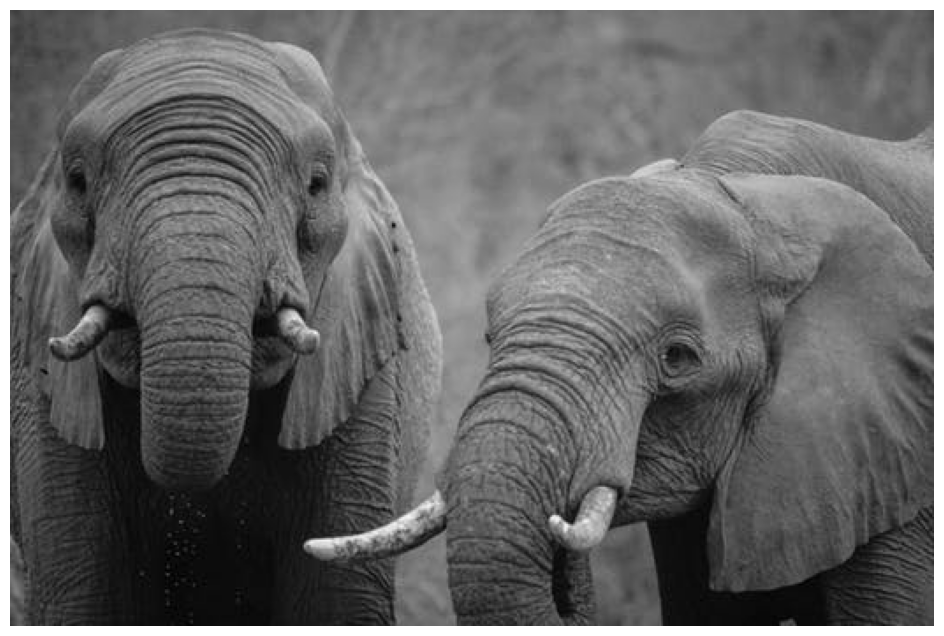

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

# Đường dẫn đến bức ảnh đầu tiên
img_path = "/kaggle/input/xla-images/elephant_g.jpg"

# Mở ảnh 
img = Image.open(img_path)

# Tạo một cửa sổ hiển thị với kích thước lớn
plt.figure(figsize=(12, 8))

# Hiển thị bức ảnh xám
plt.imshow(img)  # Đặt `cmap='gray'` để hiển thị ảnh xám

# Tắt hiển thị trục tọa độ x và y để ảnh nhìn đẹp hơn
plt.axis('off')

# Hiển thị ảnh
plt.show()

Ảnh sau xử lý 

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


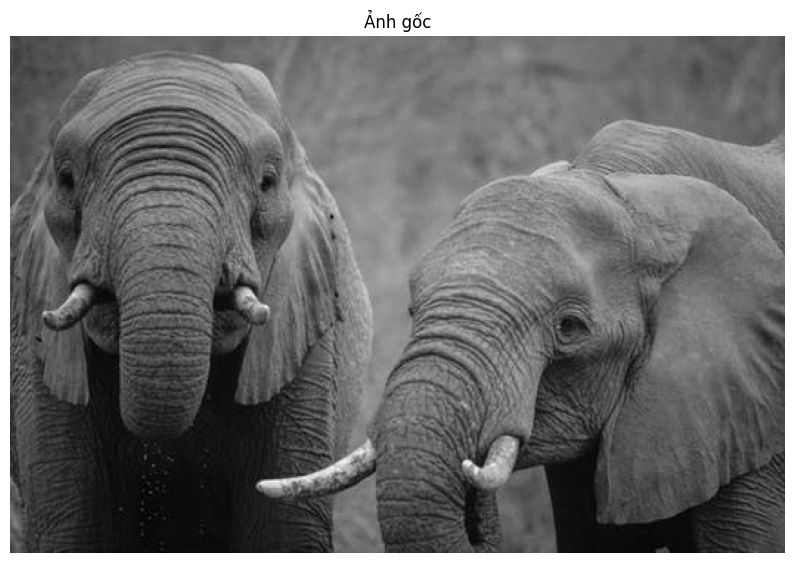

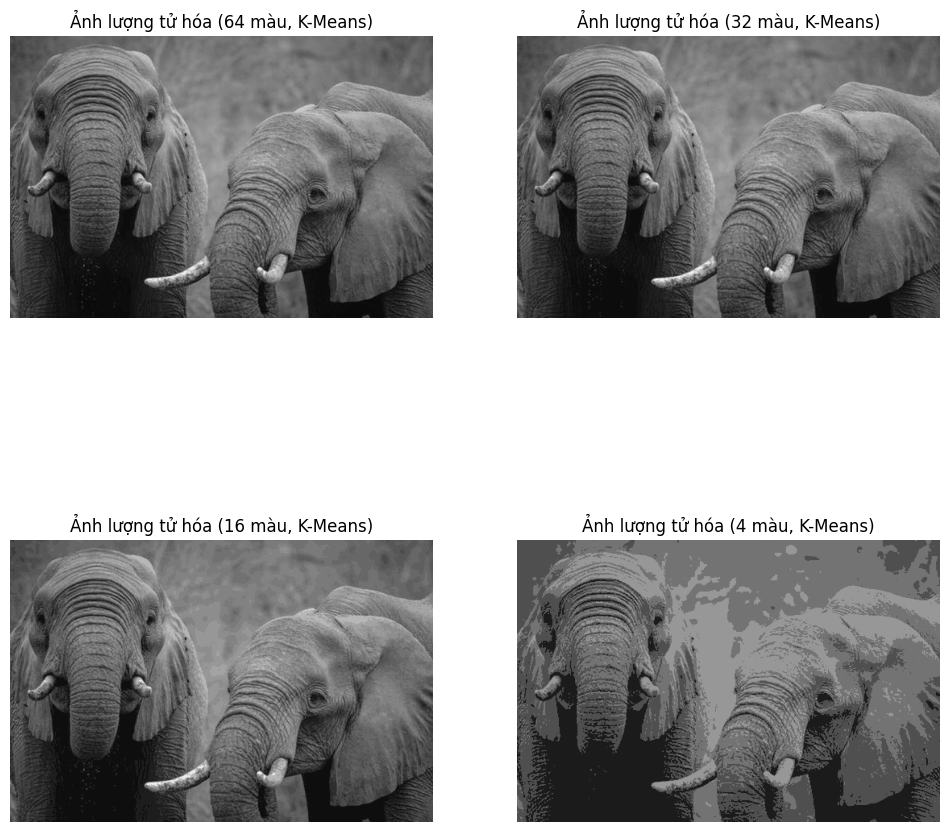

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from PIL import Image
import time

# Đường dẫn đến ảnh đầu vào
img_path = "/kaggle/input/xla-images/elephant_g.jpg"

# Mở và chuyển ảnh sang dạng float để thực hiện việc lượng tử hóa màu
img = Image.open(img_path)
img = np.array(img, dtype=np.float64) / 255  # Chuyển đổi thành dạng float trong khoảng [0, 1]

# Lấy kích thước ảnh và chuyển đổi thành mảng 2D
w, h, d = img.shape
image_array = np.reshape(img, (w * h, d))

# Hàm để tái tạo lại ảnh từ các cụm màu và nhãn
def recreate_image(codebook, labels, w, h):
    """Tái tạo ảnh từ codebook (bảng màu) và nhãn"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Hiển thị ảnh gốc
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.title('Ảnh gốc')
plt.imshow(img)

# Áp dụng k-means với số lượng màu giảm dần
plt.figure(figsize=(12, 12))
for i, n_colors in enumerate([64, 32, 16, 4], 1):
    # Chọn mẫu ngẫu nhiên từ dữ liệu
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    
    # Thực hiện k-means
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    
    # Dự đoán màu cho toàn bộ ảnh
    labels = kmeans.predict(image_array)
    
    # Tạo lại ảnh với bảng màu từ k-means
    quantized_img = recreate_image(kmeans.cluster_centers_, labels, w, h)
    
    # Hiển thị ảnh đã lượng tử hóa
    plt.subplot(2, 2, i)
    plt.axis('off')
    plt.title(f'Ảnh lượng tử hóa ({n_colors} màu, K-Means)')
    plt.imshow(quantized_img)

plt.show()


# Spectral Clustering for Image Segmentation

Ảnh ban đầu 

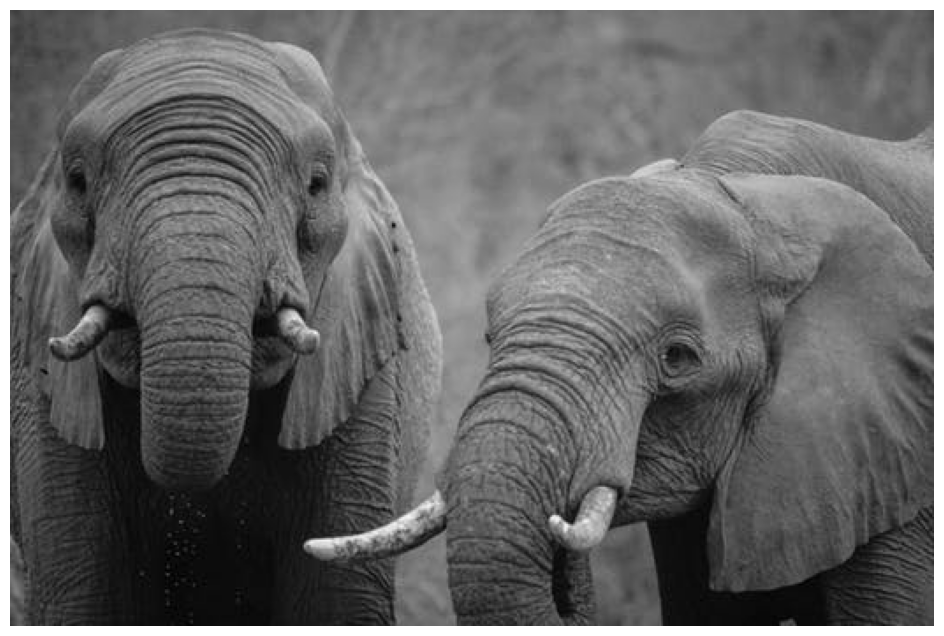

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

# Đường dẫn đến bức ảnh đầu tiên
img_path = "/kaggle/input/xla-images/elephant_g.jpg"

# Mở ảnh 
img = Image.open(img_path)

# Tạo một cửa sổ hiển thị với kích thước lớn
plt.figure(figsize=(12, 8))

# Hiển thị bức ảnh xám
plt.imshow(img)  # Đặt `cmap='gray'` để hiển thị ảnh xám

# Tắt hiển thị trục tọa độ x và y để ảnh nhìn đẹp hơn
plt.axis('off')

# Hiển thị ảnh
plt.show()

Ảnh sau xử lý 

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/tmp/ipykernel_30/1601683889.py:46: UserWarning: The following kwargs were not used by contour: 'contours'
  plt.contour(labels_kmeans == 0, contours=1, colors='red')
/tmp/ipykernel_30/1601683889.py:59: UserWarning: The following kwargs were not used by contour: 'contours'
  plt.contour(labels_spectral == 0, contours=1, colors='red')


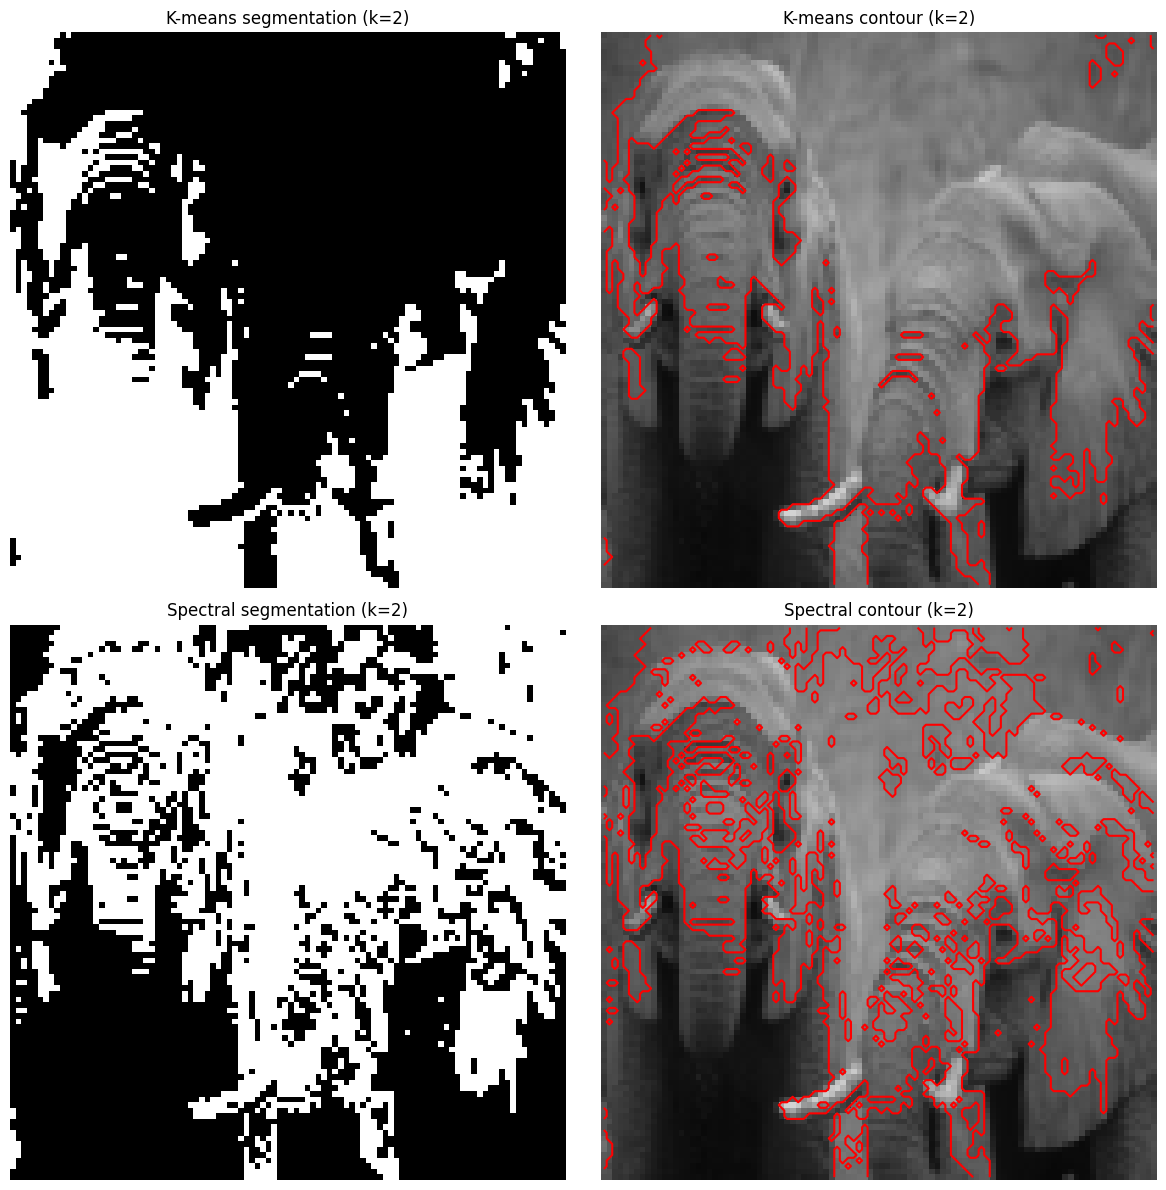

In [12]:
import numpy as np
from sklearn import cluster
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.transform import resize

# Đường dẫn đến ảnh đầu vào
img_path = "/kaggle/input/xla-images/elephant_g.jpg"

# Mở và thay đổi kích thước ảnh
im = resize(imread(img_path), (100, 100), anti_aliasing=True)
img = rgb2gray(im)  # Chuyển ảnh thành ảnh xám để xử lý

# Định dạng lại ảnh thành mảng 2D để dùng cho phân cụm
X = np.reshape(im, (-1, im.shape[-1]))

# Số cụm cho phân cụm nhị phân (foreground và background)
k = 2  

# Phân cụm K-means
two_means = cluster.MiniBatchKMeans(n_clusters=k, random_state=10)
two_means.fit(X)
y_pred_kmeans = two_means.predict(X)
labels_kmeans = np.reshape(y_pred_kmeans, img.shape)

# Phân cụm phổ (Spectral Clustering)
spectral = cluster.SpectralClustering(n_clusters=k, eigen_solver='arpack',
                                      affinity="nearest_neighbors", n_neighbors=10, random_state=10)
spectral.fit(X)
y_pred_spectral = spectral.labels_
labels_spectral = np.reshape(y_pred_spectral, img.shape)

# Hiển thị kết quả
plt.figure(figsize=(12, 12))

# Ảnh phân đoạn bằng k-means
plt.subplot(221)
plt.imshow(labels_kmeans, cmap='gray')
plt.title('K-means segmentation (k=2)')
plt.axis('off')

# Contour k-means trên ảnh gốc
plt.subplot(222)
plt.imshow(im)
plt.contour(labels_kmeans == 0, contours=1, colors='red')
plt.axis('off')
plt.title('K-means contour (k=2)')

# Ảnh phân đoạn bằng Spectral Clustering
plt.subplot(223)
plt.imshow(labels_spectral, cmap='gray')
plt.title('Spectral segmentation (k=2)')
plt.axis('off')

# Contour Spectral Clustering trên ảnh gốc
plt.subplot(224)
plt.imshow(im)
plt.contour(labels_spectral == 0, contours=1, colors='red')
plt.axis('off')
plt.title('Spectral contour (k=2)')

plt.tight_layout()
plt.show()
